<a href="https://colab.research.google.com/github/Sunisa78-8/plpl/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     MIDTERM*
      - นางสาวlสุนิสา อุดมขันธุ์                   รหัส 643021278-8        

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

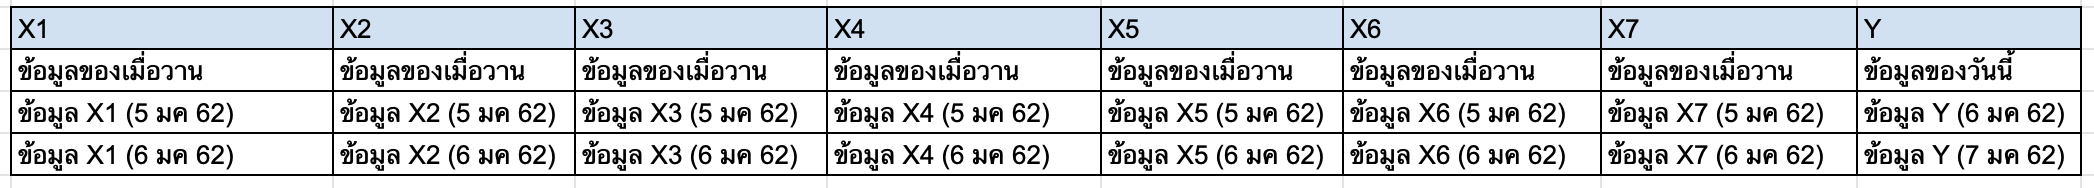

(Met) Meteorology = อุตุนิยมวิทยา

(Atp) Atmospheric pressure = ความกดอากาศ - %

(ReH) Relative Humidity = ความชื้นสัมพัทธ์ - %

(Wind) Wind Speed = ความเร็วลม  - นอต

(Cloud) Cloud Amount = จำนวนเมฆ  - 10ส่วน

(Rain) Rainfall = ปริมาณฝน - ml.

(Dpt) Dew point temperature =  อุณหภูมิจุดน้ำค้าง  - c

(LT) lowest temperature = อุณหภูมิต่ำสุด - c

(Dbt) Dry-bulb temperature= อุณหภูมิตุ้มแห้ง   - c

KK = ขอนแก่น

NKP = นครพนม

L = เลย

SKN = สกลนคร

NK = หนองคาย

In [1]:
import pandas as pd
import numpy as np
import os

#เชื่อม Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1.ความกดอากาศ Atmospheric pressure  (Atp)

In [3]:
###ชุดข้อมูลทั้ง 5 จังหวัดของหมวดความกดอากาศ
Atp_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
Atp_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
Atp_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
Atp_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
Atp_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)


In [4]:
### test
Atp_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


**----- เปลี่ยนชื่อ column1 -----**

In [5]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}


In [6]:
###เปลี่ยนชื่อ column ทุกจังหวัด
Atp_KK=Atp_KK.rename(columns=p)
Atp_NKP=Atp_NKP.rename(columns=p)
Atp_SKN=Atp_SKN.rename(columns=p)
Atp_NK =Atp_NK .rename(columns=p)
Atp_L =Atp_L.rename(columns=p)

In [7]:
### test
Atp_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


##ขอนแก่น (KK)

###เช็ค Missing & แก้ Missing ---> Mean

In [8]:
Atp_KK = Atp_KK.replace('-',np.NaN)

In [9]:
Atp_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [10]:
#มีค่าผิดปกติ 3 ค่า ใน 29,30,31 ก็เลยแทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Atp_KK['ที่'])):Atp_KK.iloc[i,:]=Atp_KK.iloc[i,:].fillna(Atp_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [11]:
Atp_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.670000,1011.300000,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.130000,1010.470000,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.980000,1015.530000,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.690000,1012.340000,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.530000,1010.470000,1009.749667,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.710000,1008.700000,1011.830000,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.040000,1009.540000,1010.464333,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.900000,1011.640000,1014.860000,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.310000,1014.990000,1015.580000,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,1011.207500,1011.207500,1011.207500,1011.207500



##นครพนม (NKP)



###เช็ค Missing & แก้ Missing ---> Mean

In [12]:
Atp_NKP = Atp_NKP.replace('-',np.NaN)
Atp_NKP.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [13]:
for i in range(len(Atp_NKP['ที่'])):Atp_NKP.iloc[i,:]=Atp_NKP.iloc[i,:].fillna(Atp_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##เลย (L)




###เช็ค Missing & แก้ Missing ---> Mean

In [14]:
Atp_L = Atp_L.replace('-',np.NaN)
Atp_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [15]:
##แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Atp_L['ที่'])):Atp_L.iloc[i,:]=Atp_L.iloc[i,:].fillna(Atp_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##สกลนคร (SKN)



###เช็ค Missing & แก้ Missing ---> Mean

In [16]:
Atp_SKN = Atp_SKN.replace('-',np.NaN)
Atp_SKN.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [17]:
##แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Atp_SKN['ที่'])):Atp_SKN.iloc[i,:]=Atp_SKN.iloc[i,:].fillna(Atp_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##หนองคาย NK

###เช็ค Missing & แก้ Missing ---> Mean

In [18]:
Atp_NK = Atp_NK.replace('-',np.NaN)
Atp_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [19]:
##แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Atp_NK['ที่'])):Atp_NK.iloc[i,:]=Atp_NK.iloc[i,:].fillna(Atp_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

#2.ความชื้นสัมพัทธ์ Relative Humidity   (ReH)

In [20]:
### ชุดข้อมูล
ReH_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
ReH_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
ReH_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
ReH_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
ReH_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)


In [21]:
ReH_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,73,73,72,81,83,73,70,...,65,68,69,69,62,64,69,74,68,72
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,64,67,67,66,65,65,67,...,63,75,82,75,73,73,75,74,-,68
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,68,66,69,71,69,63,67,...,59,56,60,59,58,61,57,55,54,62
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,62,58,59,60,62,61,62,...,59,59,59,67,71,91,78,71,72,63
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,69,66,62,58,59,53,50,...,50,52,56,53,51,54,-,-,-,55


**----- เปลี่ยนชื่อ column2 -----**

In [22]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
ReH_KK=ReH_KK.rename(columns=p)
ReH_NKP=ReH_NKP.rename(columns=p)
ReH_SKN=ReH_SKN.rename(columns=p)
ReH_NK =ReH_NK .rename(columns=p)
ReH_L =ReH_L.rename(columns=p)

In [23]:
ReH_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,73,73,72,81,83,73,70,...,65,68,69,69,62,64,69,74,68,72
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,64,67,67,66,65,65,67,...,63,75,82,75,73,73,75,74,-,68
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,68,66,69,71,69,63,67,...,59,56,60,59,58,61,57,55,54,62
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,62,58,59,60,62,61,62,...,59,59,59,67,71,91,78,71,72,63
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,69,66,62,58,59,53,50,...,50,52,56,53,51,54,-,-,-,55


##ขอนแก่น (KK)


###เช็ค Missing & แก้ Missing ---> Mean


In [24]:

ReH_KK= ReH_KK.replace('-',np.NaN)
ReH_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [25]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_KK['ที่'])):ReH_KK.iloc[i,:]=ReH_KK.iloc[i,:].fillna(ReH_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean

In [26]:

ReH_NKP = ReH_NKP.replace('-',np.NaN)
ReH_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [27]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_NKP['ที่'])):ReH_NKP.iloc[i,:]=ReH_NKP.iloc[i,:].fillna(ReH_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_NKP.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##เลย (L)


###เช็ค Missing & แก้ Missing ---> Mean

In [28]:
ReH_L = ReH_L.replace('-',np.NaN)
ReH_L.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [29]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_L['ที่'])):ReH_L.iloc[i,:]=ReH_L.iloc[i,:].fillna(ReH_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##สกลนคร (SKN)

###เช็ค Missing & แก้ Missing ---> Mean


In [30]:
ReH_SKN = ReH_SKN.replace('-',np.NaN)
ReH_SKN.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [31]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_SKN['ที่'])):ReH_SKN.iloc[i,:]=ReH_SKN.iloc[i,:].fillna(ReH_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool


##หนองคาย NK

###เช็ค Missing & แก้ Missing ---> Mean


In [32]:
ReH_NK = ReH_NK.replace('-',np.NaN)
ReH_NK.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [33]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_NK['ที่'])):ReH_NK.iloc[i,:]=ReH_NK.iloc[i,:].fillna(ReH_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

#3.ความเร็วลม  Wind Speed (Wind)

In [34]:
### ชุดข้อมูล
Wind_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
Wind_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
Wind_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx",header=4)
Wind_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx",header=4)
Wind_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx",header=4)


In [35]:
Wind_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


**----- เปลี่ยนชื่อ column3 -----**

In [36]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Wind_KK=Wind_KK.rename(columns=p)
Wind_NKP=Wind_NKP.rename(columns=p)
Wind_SKN=Wind_SKN.rename(columns=p)
Wind_NK =Wind_NK .rename(columns=p)
Wind_L =Wind_L.rename(columns=p)

In [37]:
Wind_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


##ขอนแก่น (KK)


###เช็ค Missing & แก้ Missing ---> Mean


In [38]:

Wind_KK = Wind_KK.replace('-',np.NaN)
Wind_KK.isnull().any()
##ค่า missing เยอะ

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3             True
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [39]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Wind_KK['ที่'])):Wind_KK.iloc[i,:]=Wind_KK.iloc[i,:].fillna(Wind_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Wind_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean


In [40]:

Wind_NKP = Wind_NKP.replace('-',np.NaN)
Wind_NKP.isnull().any()
##ค่า missing เยอะ





ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4             True
5             True
6            False
7             True
8             True
9            False
10            True
11            True
12            True
13           False
14           False
15            True
16            True
17           False
18            True
19           False
20            True
21            True
22            True
23           False
24            True
25            True
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [41]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Wind_NKP['ที่'])):Wind_NKP.iloc[i,:]=Wind_NKP.iloc[i,:].fillna(Wind_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Wind_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##เลย (L)


###เช็ค Missing & แก้ Missing ---> Mean


In [42]:

Wind_L = Wind_L.replace('-',np.NaN)
Wind_L.isnull().any()
##ค่า missing เยอะ


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5             True
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16            True
17           False
18           False
19            True
20           False
21           False
22           False
23           False
24            True
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

##สกลนคร (SKN)


##หนองคาย (NK)

#4.จำนวนเมฆ Cloud Amount (Cloud)

In [94]:
### ชุดข้อมูล
Cloud_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx",header=4)
Cloud_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4)
Cloud_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx",header=4)
Cloud_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx",header=4)
Cloud_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx",header=4)

In [95]:
Cloud_NK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,5,8,8,7,2,...,4,1,2,4,1,3,4,3,4,2.806452
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,0,6,3,2,2,...,2,8,7,6,6,8,8,4,-,3.900000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,3,7,5,3,3,4,...,4,4,7,9,2,1,0,3,4,2.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,2,0,1,1,3,1,...,1,4,3,7,10,10,5,4,10,3.448276
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,8,8,5,0,0,0,...,1,1,2,3,1,1,NaN,NaN,-,2.375000


**----- เปลี่ยนชื่อ column4 -----**

In [96]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Cloud_KK=Cloud_KK.rename(columns=p)
Cloud_NKP=Cloud_NKP.rename(columns=p)
Cloud_SKN=Cloud_SKN.rename(columns=p)
Cloud_NK =Cloud_NK .rename(columns=p)
Cloud_L =Cloud_L.rename(columns=p)

In [97]:
Cloud_NK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,5,8,8,7,2,...,4,1,2,4,1,3,4,3,4,2.806452
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,0,6,3,2,2,...,2,8,7,6,6,8,8,4,-,3.900000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,3,7,5,3,3,4,...,4,4,7,9,2,1,0,3,4,2.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,2,0,1,1,3,1,...,1,4,3,7,10,10,5,4,10,3.448276
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,8,8,5,0,0,0,...,1,1,2,3,1,1,NaN,NaN,-,2.375000


##ขอนแก่น (KK)


###เช็ค Missing & แก้ Missing ---> Mean


In [98]:
Cloud_KK = Cloud_KK.replace('-',np.NaN)
Cloud_KK.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3             True
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [99]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_KK['ที่'])):Cloud_KK.iloc[i,:]=Cloud_KK.iloc[i,:].fillna(Cloud_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean


In [100]:

Cloud_NKP = Cloud_NKP.replace('-',np.NaN)
Cloud_NKP.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11           False
12           False
13            True
14            True
15            True
16           False
17           False
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26           False
27            True
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [102]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_NKP['ที่'])):Cloud_NKP.iloc[i,:]=Cloud_NKP.iloc[i,:].fillna(Cloud_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##เลย (L)



###เช็ค Missing & แก้ Missing ---> Mean


In [103]:

Cloud_L = Cloud_L.replace('-',np.NaN)
Cloud_L.isnull().any()
#เยอะ

ที่            False
สถานี          False
เดือน/ปี       False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
ค่าเฉลี่ย      False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
dtype: bool

####*จังหวัดเลย มีคอลัมน์เกินมาในจำนวนเมฆ

In [104]:
### ตัดคอลัมน์เกินออก
Cloud_L = Cloud_L.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [105]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_L['ที่'])):Cloud_L.iloc[i,:]=Cloud_L.iloc[i,:].fillna(Cloud_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##สกลนคร (SKN)


###เช็ค Missing & แก้ Missing ---> Mean


In [86]:
Cloud_SKN = Cloud_SKN.replace('-',np.NaN)
Cloud_SKN.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [87]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_SKN['ที่'])):Cloud_SKN.iloc[i,:]=Cloud_SKN.iloc[i,:].fillna(Cloud_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

##หนองคาย (NK)

###เช็ค Missing & แก้ Missing ---> Mean


In [88]:


Wind_NK = Wind_NK.replace('-',np.NaN)
Wind_NK.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4             True
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [89]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Wind_NK['ที่'])):Wind_NK.iloc[i,:]=Wind_NK.iloc[i,:].fillna(Wind_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Wind_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

#5.ปริมาณฝน Rainfall (Rain)

In [106]:
### ชุดข้อมูล
Rain_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
Rain_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
Rain_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx",header=4)
Rain_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx",header=4)
Rain_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx",header=4)

In [55]:
Rain_L

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4
5,3,353201-เลย จ.เลย,2012-10-01,0,0,0.6,2,4.8,0,4.6,...,0,0,0,0,0,0,0,2,0,15
6,4,353201-เลย จ.เลย,2012-11-01,0,0,0,1,0,0,0,...,0.2,2.3,4.1,0.2,4.8,1.9,0,0,-,21.4
7,5,353201-เลย จ.เลย,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
8,6,353201-เลย จ.เลย,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2.8,1,0,0,7.2,11
9,7,353201-เลย จ.เลย,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**----- เปลี่ยนชื่อ column5 ----- **

In [107]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Rain_KK=Rain_KK.rename(columns=p)
Rain_NKP=Rain_NKP.rename(columns=p)
Rain_SKN=Rain_SKN.rename(columns=p)
Rain_NK =Rain_NK .rename(columns=p)
Rain_L =Rain_L.rename(columns=p)

In [108]:
Rain_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


##ขอนแก่น (KK)



###เช็ค Missing & แก้ Missing ---> Mean


In [113]:
Rain_KK = Rain_KK.replace('-',np.NaN)
Rain_KK.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

In [112]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Rain_KK['ที่'])):Rain_KK.iloc[i,:]=Rain_KK.iloc[i,:].fillna(Rain_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Rain_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

##นครพนม (NKP)


##เลย (L)


##สกลนคร (SKN)


##หนองคาย (NK)

#6.อุณหภูมิจุดน้ำค้าง Dew point temperature  (Dpt)

In [57]:
### ชุดข้อมูล
Dpt_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dpt_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dpt_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dpt_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dpt_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx",header=4)

In [58]:
Dpt_L

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,...,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,...,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,...,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-,17.600000


**----- เปลี่ยนชื่อ column6 -----**

In [59]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Dpt_KK=Atp_KK.rename(columns=p)
Dpt_NKP=Atp_NKP.rename(columns=p)
Dpt_SKN=Atp_SKN.rename(columns=p)
Dpt_NK =Atp_NK .rename(columns=p)
Dpt_L =Atp_L.rename(columns=p)

In [60]:
Dpt_L

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.690000,1011.270000,1011.710000,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.100000,1010.430000,1012.078333,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.490000,1014.970000,1015.620000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.160000,1012.610000,1014.400000,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.520000,1010.430000,1009.516667,1009.516667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.41,1010.77,1008.72,1007.10,1008.28,1010.43,1010.47,...,1011.23,1010.45,1009.91,1009.48,1008.96,1008.94,1008.570000,1008.670000,1011.740000,1010.511613
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.46,1011.06,1010.41,1010.43,1010.33,1010.79,1009.67,...,1008.87,1010.62,1011.06,1010.99,1010.52,1010.43,1010.110000,1009.830000,1010.542667,1010.542667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.81,1010.25,1011.09,1010.69,1010.66,1011.99,1011.76,...,1014.52,1016.15,1013.87,1012.48,1011.23,1010.29,1010.230000,1011.630000,1014.750000,1011.970645
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.63,1013.32,1013.99,1012.97,1011.70,1012.76,1012.56,...,1013.02,1012.71,1012.15,1011.74,1014.16,1015.69,1014.810000,1014.810000,1016.390000,1013.735484
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.68,1014.51,1013.94,1013.86,1013.70,1011.59,1008.45,...,1015.19,1013.89,1012.02,1010.21,1008.33,1006.60,1011.348571,1011.348571,1011.348571,1011.348571


#7.อุณหภูมิตุ้มแห้ง   Dry-bulb temperature (Dbt)

In [61]:
### ชุดข้อมูล
Dbt_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dbt_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dbt_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dbt_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dbt_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx",header=4)

In [62]:
Dbt_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,26.8,27.4,28.3,27.9,27.4,27.3,26.5,...,27.6,27.9,27.8,27.6,27.8,28.8,29,28.3,27.5,27.6
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,25.6,26.0,26.7,27.5,28.2,28.4,28.4,...,30.0,26.8,26.0,28.2,27.9,27.2,27.5,28,-,27.9
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,28.5,28.6,28.1,26.9,28.0,25.0,25.7,...,24.8,21.7,22.9,25.3,26.5,26.5,26.9,25.3,20.4,26.2
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,20.8,23.9,24.9,23.5,23.8,24.3,24.1,...,26.1,26.3,26.3,25.4,25.1,20.1,23.2,24.1,24.1,24.0
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,24.7,25.0,24.9,26.8,27.8,28.2,29.6,...,24.6,26.0,28.0,29.7,31.0,31.0,-,-,-,27.6


**----- เปลี่ยนชื่อ column7 -----**

In [63]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Dbt_KK=Atp_KK.rename(columns=p)
Dbt_NKP=Atp_NKP.rename(columns=p)
Dbt_SKN=Atp_SKN.rename(columns=p)
Dbt_NK =Atp_NK .rename(columns=p)
Dbt_L =Atp_L.rename(columns=p)

In [64]:
Dbt_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.670000,1011.300000,1011.520000,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.130000,1010.470000,1011.717000,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.980000,1015.530000,1016.400000,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.690000,1012.340000,1014.520000,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.530000,1010.470000,1009.749667,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.710000,1008.700000,1011.830000,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.040000,1009.540000,1010.464333,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.900000,1011.640000,1014.860000,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.310000,1014.990000,1015.580000,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,1011.207500,1011.207500,1011.207500,1011.207500


#8.อุณหภูมิต่ำสุด  lowest temperature  (LT)


In [65]:
### ชุดข้อมูล
LT_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
LT_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx",header=4)
LT_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx",header=4)
LT_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
LT_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx",header=4)

In [66]:
LT_NK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,23.0,23.7,24.6,24.0,24.7,23.4,22.7,...,23.3,23.2,24.1,24.6,22.5,24,24.3,25.3,24,24.0
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,21.0,20.7,21.3,24.1,24.3,24.0,24.2,...,25.4,24.5,24.2,23.5,22.8,22.9,23.1,23.5,-,23.4
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.6,25.0,24.0,23.7,22.8,20.8,20.1,...,19.3,16.6,17.1,17.8,20.2,20,19.6,20.3,13.7,20.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.6,16.7,17.8,17.3,17.0,17.1,17.0,...,18.7,18.9,20.7,21.0,22.5,18.5,18.1,18,21.5,17.9
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,18.4,20.3,19.6,22.0,19.9,19.9,22.1,...,18.8,17.4,20.3,20.5,23.1,25.4,-,-,-,20.8


**----- เปลี่ยนชื่อ column8 -----**

In [67]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
LT_KK=Atp_KK.rename(columns=p)
LT_NKP=Atp_NKP.rename(columns=p)
LT_SKN=Atp_SKN.rename(columns=p)
LT_NK =Atp_NK .rename(columns=p)
LT_L =Atp_L.rename(columns=p)

In [68]:
LT_NK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.880000,1011.770000,1012.180000,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.710000,1011.100000,1012.332333,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.630000,1016.310000,1017.190000,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.960000,1013.160000,1015.380000,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.070000,1011.100000,1010.214667,1010.214667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.66,1011.44,1008.66,1006.94,1008.62,1011.05,1010.61,...,1011.80,1010.75,1010.30,1009.82,1009.26,1008.40,1008.970000,1008.890000,1012.230000,1010.823871
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1013.25,1011.65,1010.88,1010.79,1010.84,1011.38,1009.94,...,1009.16,1010.86,1011.62,1011.53,1011.11,1010.83,1010.740000,1010.100000,1010.951667,1010.951667
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1010.04,1010.28,1011.34,1011.40,1011.31,1013.40,1012.42,...,1015.72,1017.22,1014.72,1012.86,1011.53,1010.58,1010.920000,1012.660000,1015.720000,1012.494516
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1015.38,1014.02,1014.56,1014.07,1012.31,1012.87,1013.07,...,1013.98,1013.14,1012.74,1013.02,1015.21,1016.80,1015.970000,1015.360000,1017.110000,1014.523871
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1016.12,1015.23,1014.67,1014.85,1014.34,1011.44,1008.49,...,1016.37,1014.56,1012.50,1010.69,1008.41,1006.75,1011.956786,1011.956786,1011.956786,1011.956786
